In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

# параметры распределений
mu0, mu01, sigma0 = -2., 0.5 , 1.
mu1, mu11, sigma1 = 3., 1.5,  2.

In [53]:
# параметры распределений
mu0, sigma0 = [-2., 0.5] , 1.
mu1, sigma1 = [3., 1.5],  2.

In [54]:
def sample(d0, d1, n=32):
    x0 = d0.rsample((n,))
    #print ("x0 = ", x0)
    x1 = d1.rsample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [55]:
d0 = torch.distributions.Normal(torch.tensor(mu0), torch.tensor([sigma0]))
d1 = torch.distributions.Normal(torch.tensor(mu1), torch.tensor([sigma1]))

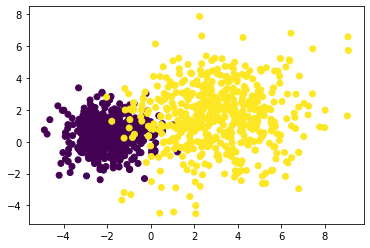

In [56]:
x, y = sample(d0, d1, 512)
plt.scatter(x[:,0], x[:,1], c=y.flatten())
plt.show()

In [57]:
layer = nn.Linear(2, 1)
#layer = nn.Linear(1, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([ 0.5269, -0.6101]), tensor(-0.6900)]


In [58]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = torch.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

Ошибка после 0 итераций: 0.563695
Ошибка после 1 итераций: 0.327091
Ошибка после 2 итераций: 0.248590
Ошибка после 3 итераций: 0.210276
Ошибка после 4 итераций: 0.190219
Ошибка после 5 итераций: 0.175661
Ошибка после 6 итераций: 0.166861
Ошибка после 7 итераций: 0.160528
Ошибка после 8 итераций: 0.155520
Ошибка после 9 итераций: 0.152175
Ошибка после 10 итераций: 0.148453
Ошибка после 11 итераций: 0.143401
Ошибка после 12 итераций: 0.143159
Ошибка после 13 итераций: 0.140966
Ошибка после 14 итераций: 0.139965
Ошибка после 15 итераций: 0.138340
Ошибка после 16 итераций: 0.136986
Ошибка после 17 итераций: 0.134359
Ошибка после 18 итераций: 0.134808
Ошибка после 19 итераций: 0.134703


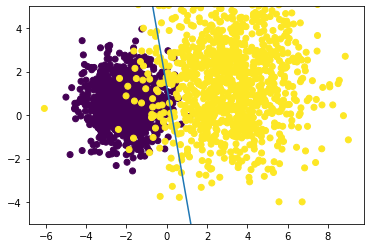

In [66]:
# Визуализация разделяющей прямой

coefs = [p[0] for p in layer.parameters()]
b1 = float(coefs[0][0])
b2 = float(coefs[0][1])
b0 = float(coefs[1])

x, y = sample(d0, d1, 1024)

plt.scatter(x[:,0], x[:,1], c=y.flatten())

xrange = np.array([-4, 6])
line = -(b1 * xrange + b0) / b2
plt.plot(xrange, line)
plt.ylim(-5,5)

plt.show()

In [60]:
x_scale = np.linspace(-10, 10, 5000)
x_scaleD2=np.array([np.linspace(-10, 10, 5000), np.linspace(-10, 10, 5000)]).reshape(-1,2)
d0D2_pdf = stats.norm.pdf(x_scaleD2, mu0, sigma0) 
#d0_pdf = stats.norm.pdf(x_scale, mu0, sigma0) 
d1_pdf = stats.norm.pdf(x_scaleD2, mu1, sigma1)
#d1D2_pdf = stats.norm.pdf(x_scaleD2, [mu1, mu11], sigma1)


x_tensor = torch.tensor(x_scaleD2.reshape(-1,2), dtype=torch.float)

print (x_tensor.shape)

torch.Size([5000, 2])


In [61]:
with torch.no_grad():
    dist = torch.sigmoid(layer(x_tensor)).numpy()
ratio = d1D2_pdf / (d1D2_pdf + d0D2_pdf)

In [62]:
d1D2_pdf.shape

(5000, 2)

In [63]:
print (x_tensor.shape)
print(dist.flatten().shape)
print(d0D2_pdf.reshape(2,-1)[0])

torch.Size([5000, 2])
(5000,)
[5.05227108e-15 4.77163584e-25 5.38608433e-15 ... 1.08735323e-20
 2.25192643e-32 1.00779354e-20]


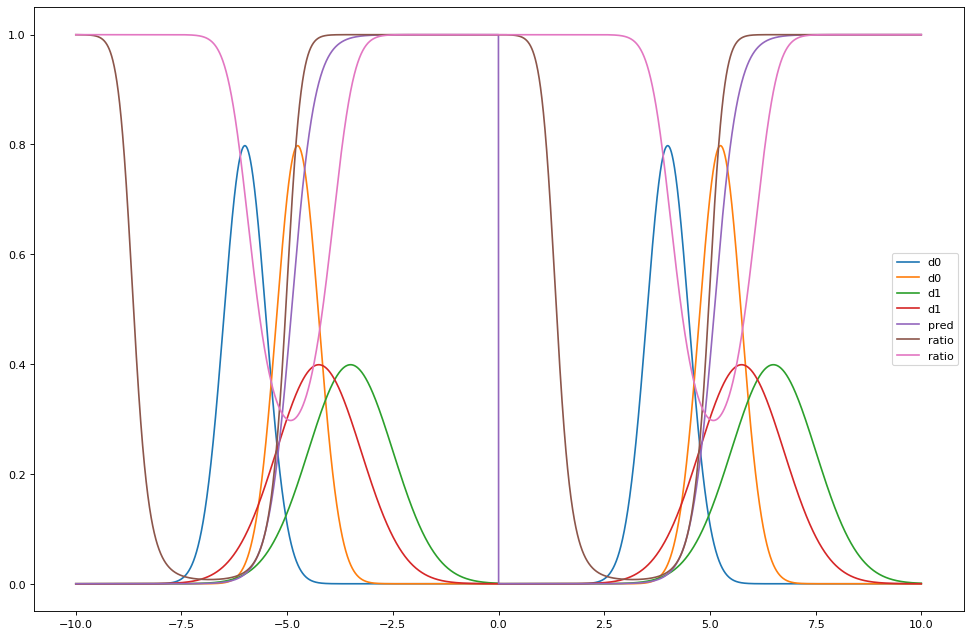

In [64]:
plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x_scale, d0D2_pdf*2, label='d0') 
plt.plot(x_scale, d1D2_pdf*2, label='d1')
plt.plot(x_scale, dist.flatten(), label='pred')
plt.plot(x_scale, ratio, label='ratio')
plt.legend();

In [32]:
print([p.data[0] for p in layer.parameters()])

[tensor([1.4737, 0.3044]), tensor(-0.2898)]


In [33]:
torch.log(torch.sigmoid(torch.tensor(-100.)))

tensor(-inf)

In [34]:
F.logsigmoid(torch.tensor(-100.))

tensor(-100.)